In [2]:
# Import 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import json

import sys
sys.path.append('../')
from helpers import cm2inch, title, show_num_contours, load_datasets
from melodic_contour import *
from sklearn import metrics

In [3]:
dfs, contours = load_datasets()

In [3]:
erk_contours = [Contour(pitches) for pitches in contours['erk']]

# Huron

In [4]:
huron_optimizer = TypologyOptimizer(HuronTypology)

In [5]:
huron_loss = huron_optimizer.loss_function(erk_contours[:5000], ['tolerance'])
huron_xs = np.linspace(0, 10, 100)
huron_ys = [-1*huron_loss([x]) for x in huron_xs]

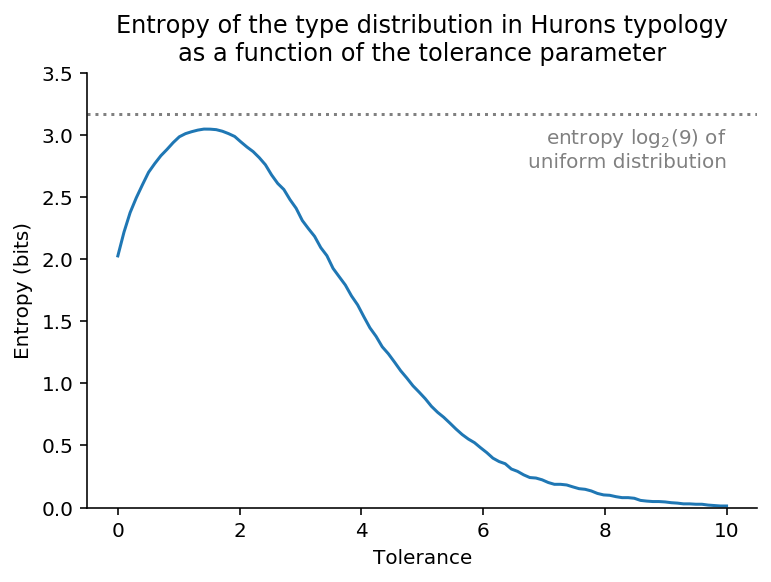

In [22]:
plt.plot(huron_xs, huron_ys)
plt.ylabel('Entropy (bits)')
plt.xlabel('Tolerance')
plt.title('Entropy of the type distribution in Hurons typology\n'
          'as a function of the tolerance parameter')
plt.axhline(np.log2(9), ls=':', c='0.5')
plt.text(10, np.log2(9)-.1, 'entropy $\log_2(9)$ of \nuniform distribution', 
         va='top', ha='right', c='0.5')
plt.ylim(0, 3.5)
sns.despine()

### Optimize the typology

In [7]:
def show_optimization(trace, res, param='tolerance'):
    tols = [t['params'][param] for t in trace]
    scores = [t['score'] for t in trace]
    plt.plot(tols, scores, '.-', lw=.1)
    plt.plot([res.x], [-1*res.fun], 'ro', alpha=.5, ms=10, label='maximum')
    plt.ylabel('Entropy (bits)')
    plt.xlabel(param)
    plt.legend()
    sns.despine()

In [32]:
huron_best, huron_res = huron_optimizer.optimize(erk_contours[:1000], dict(tolerance=[0, 10]))
huron_best

{'tolerance': 1.5086187455733513}

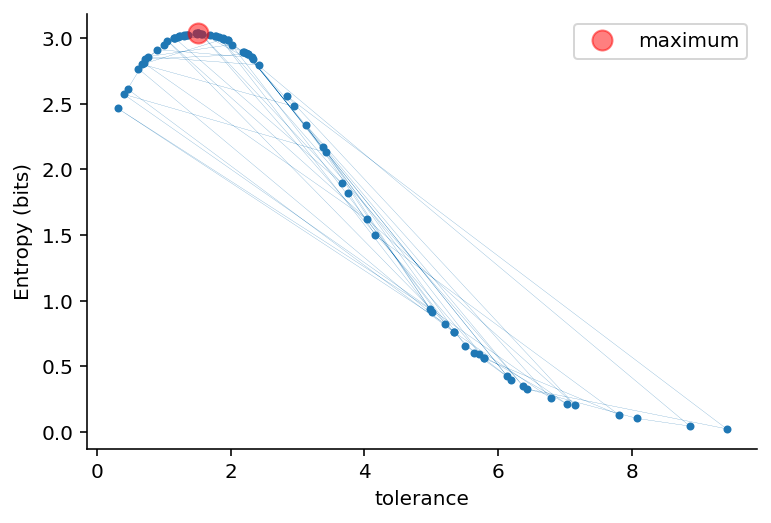

In [33]:
show_optimization(huron_optimizer.trace, huron_res)

## Sillouete

In [124]:
def get_types(typology, contours):
    types = [typology.classify(c) for c in contours]
    X = [c.pitches for c in contours]
    return X, types

def silhouete_score(*args): 
    return metrics.silhouette_score(*get_types(*args))

def calinski_harabasz_score(*args): 
    return metrics.calinski_harabasz_score(*get_types(*args))

def davies_bouldin_score(*args): 
    return metrics.davies_bouldin_score(*get_types(*args))

In [125]:
def get_scores(scoring_fn, contours, xs=np.linspace(0, 10, 50)):
    opt = TypologyOptimizer(HuronTypology, scoring_fn=scoring_fn)
    f = opt.loss_function(contours, ['tolerance'])
    ys = [-1 * f([x]) for x in xs]
    return ys

In [126]:
xs = np.linspace(0, 6, 50)
values = {}
values['silhouete'] = get_scores(silhouete_score, erk_contours[:1000], xs)
values['calinski_harabasz'] = get_scores(calinski_harabasz_score, erk_contours[:1000], xs)
values['davis_bouldin'] = get_scores(davies_bouldin_score, erk_contours[:1000], xs)

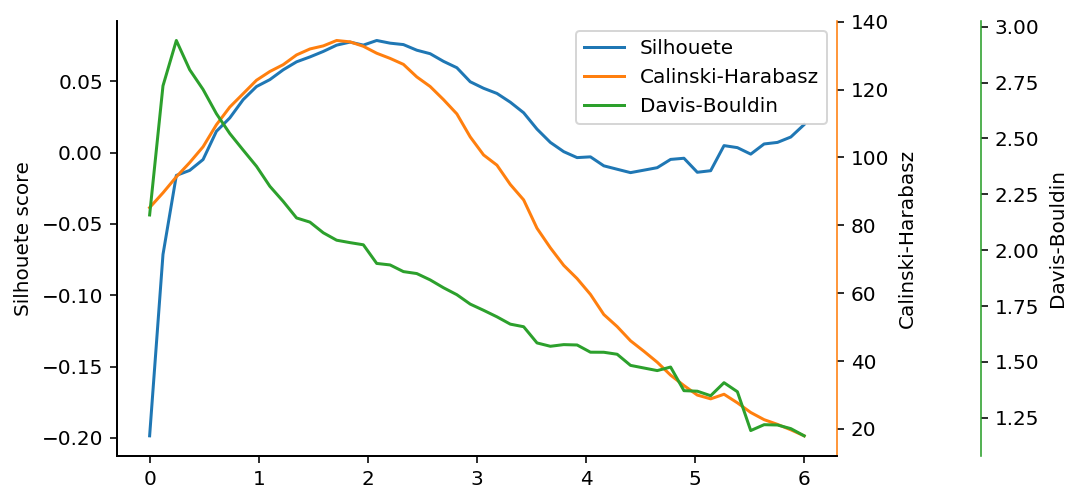

In [127]:
#https://matplotlib.org/3.1.1/gallery/ticks_and_spines/multiple_yaxis_with_spines.html
fig, host = plt.subplots(figsize=(8, 4))
fig.subplots_adjust(right=0.75)

par1 = host.twinx()
par2 = host.twinx()
sns.despine()

par1.spines["right"].set_color('C1')
par1.spines["right"].set_visible(True)

par2.spines["right"].set_position(("axes", 1.2))
par2.spines["right"].set_visible(True)
par2.spines["right"].set_color('C2')

host.set_ylabel('Silhouete score')
par1.set_ylabel('Calinski-Harabasz')
par2.set_ylabel('Davis-Bouldin')

l1, = host.plot(xs, values['silhouete'], c='C0', label='Silhouete')
l2, = par1.plot(xs, values['calinski_harabasz'], c='C1', label='Calinski-Harabasz')
l3, = par2.plot(xs, values['davis_bouldin'], c='C2', label='Davis-Bouldin')

lines = [l1, l2, l3]
host.legend(lines, [l.get_label() for l in lines])


In [59]:
opt = TypologyOptimizer(HuronTypology, scoring_fn=silhouete_score)

In [136]:
from sklearn.decomposition import PCA

In [167]:
pca = PCA(n_components=2)
X2 = pca.fit_transform(contours['erk'])

In [178]:
from IPython.display import clear_output
from time import sleep

In [181]:
np.linspace(0, 3, 10)

array([0.        , 0.33333333, 0.66666667, 1.        , 1.33333333,
       1.66666667, 2.        , 2.33333333, 2.66666667, 3.        ])

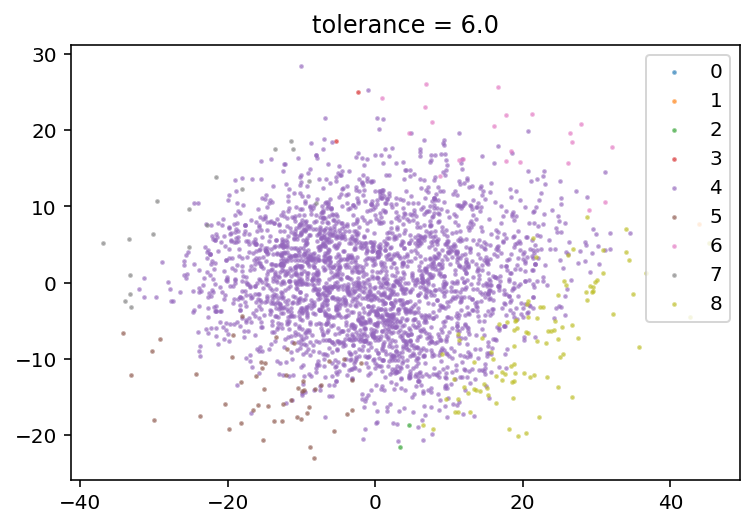

In [184]:
for tolerance in np.linspace(0, 6, 30):
    t = HuronTypology(tolerance=tolerance)
    types = np.asarray([t.types.index(t.classify(c)) for c in erk_contours])
    plt.figure()
    for contour_type in range(len(t.types)):
        index = types == contour_type
        plt.scatter(X2[index, 0], X2[index, 1], s=2, alpha=.5, label=contour_type)
    plt.legend()
    plt.title(f'tolerance = {tolerance:.1f}')
    plt.show()
    sleep(.1)
    clear_output(wait=True)

In [188]:
%matplotlib widget

In [189]:
X = contours['erk']
for contour_type in np.unique(types):
    index = types == contour_type
    plt.plot(X[index, :].mean(axis=0))

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [190]:
!{sys.executable} -m pip install nodejs

Using legacy 'setup.py install' for nodejs, since package 'wheel' is not installed.
Using legacy 'setup.py install' for optional-django, since package 'wheel' is not installed.
    Running setup.py install for optional-django ... done
    Running setup.py install for nodejs ... done


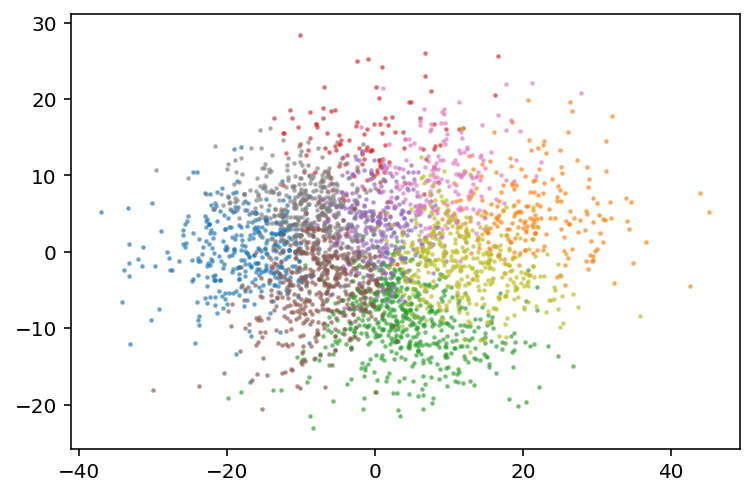

In [156]:
for contour_type in np.unique(types):
    index = types == contour_type
    plt.scatter(X2[index, 0], X2[index, 1], s=2, alpha=.5)

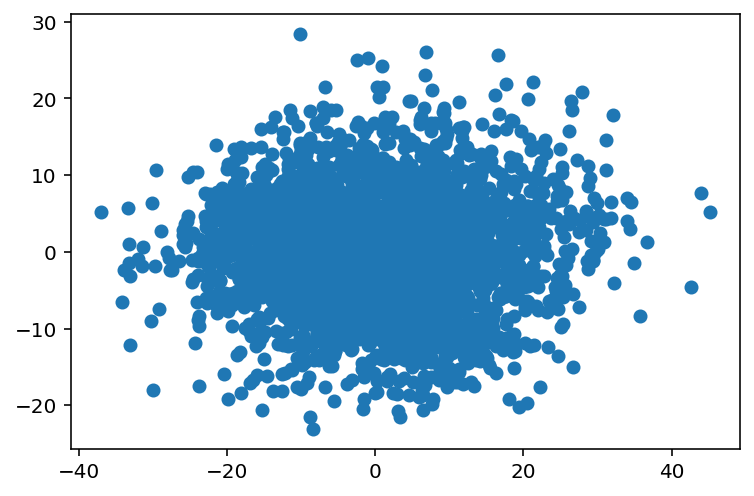

In [141]:
plt.scatter(X2[:, 0], X2[:, 1])

In [135]:
from sklearn.cluster import KMeans

In [131]:
kmeans = Kmeans(n_clusters=5)
contours['erk']

array([[-0.86, -0.86, -0.86, ..., -0.86, -0.86, -0.86],
       [-0.44, -0.44, -0.44, ..., -2.44, -2.44, -2.44],
       [-2.8 , -2.8 , -2.8 , ..., -2.8 , -2.8 , -2.8 ],
       ...,
       [ 1.28,  1.28,  1.28, ..., -0.72, -0.72, -0.72],
       [-4.62, -4.62, -4.62, ...,  2.38,  2.38,  2.38],
       [ 0.88,  0.88,  0.88, ...,  2.88,  2.88,  2.88]])

In [61]:
f = opt.loss_function(erk_contours[:1000], ['tolerance'])
xs = np.linspace(0, 10, 50)a

ys = [-1 * f([x]) for x in xs]

In [67]:
xs = np.linspace(0, 10, 50)
ys = [-1 * f([x]) for x in xs]

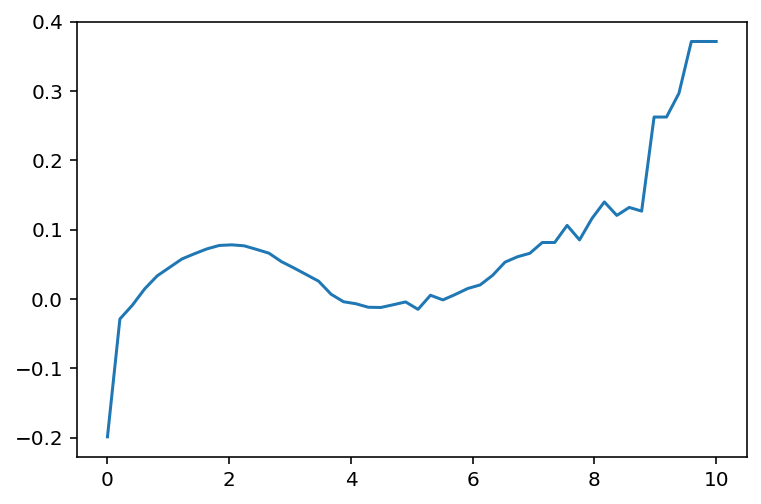

In [68]:
plt.plot(xs, ys)

In [56]:
sil_best, sil_res = sil_optimizer.optimize(erk_contours[:1000], dict(tolerance=[0, 6]))
sil_best

{'tolerance': 2.002236217340778}

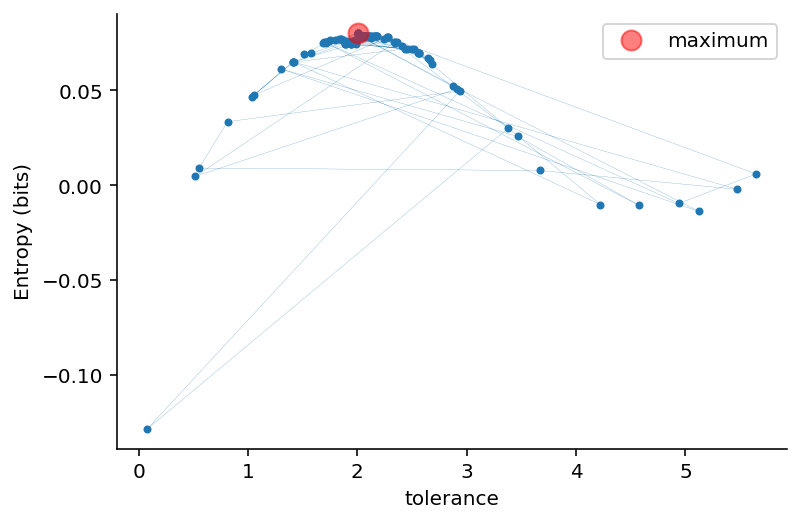

In [57]:
show_optimization(sil_optimizer.trace, sil_res)

### Calinski-Harabasz

In [47]:
def calinski_harabasz_index(typology, contours):
    types = [typology.classify(c) for c in contours]
    X = [c.pitches for c in contours]
    s = metrics.calinski_harabasz_score(X, types)
    return s

In [90]:
ch_opt = TypologyOptimizer(HuronTypology, scoring_fn=calinski_harabasz_score)
_, ch_res = ch_opt.optimize(erk_contours[:1000], dict(tolerance=[0, 6]))

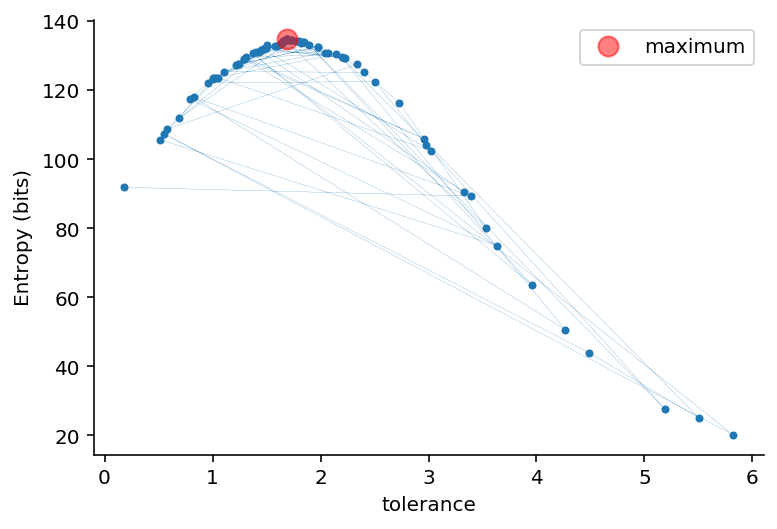

In [91]:
show_optimization(ch_opt.trace, ch_res)

# Adams

In [38]:
adams_optimizer = TypologyOptimizer(AdamsTypology)

In [39]:
adams_loss = adams_optimizer.loss_function(erk_contours[:1000], ['tolerance'])
adams_xs = np.linspace(0, 10, 100)
adams_ys = [-1*adams_loss([x]) for x in adams_xs]

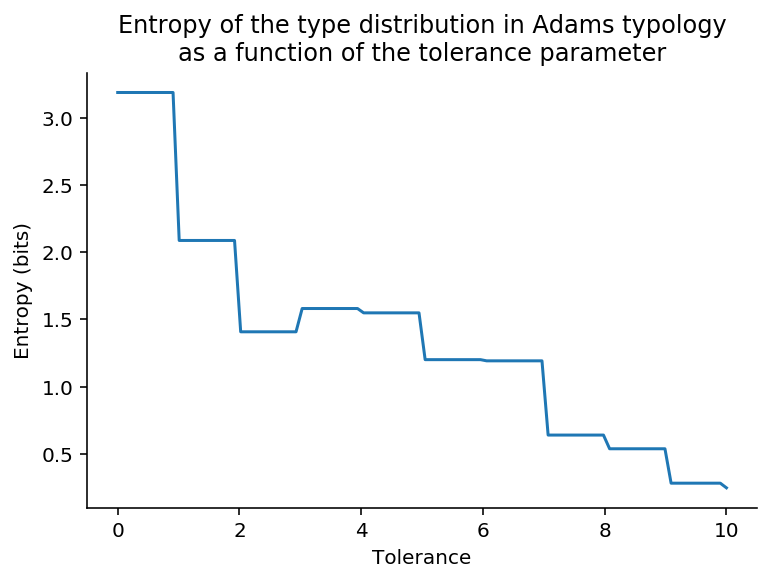

In [40]:
plt.plot(adams_xs, adams_ys)
plt.ylabel('Entropy (bits)')
plt.xlabel('Tolerance')
plt.title('Entropy of the type distribution in Adams typology\n'
          'as a function of the tolerance parameter')
sns.despine()

### Optimization 

In [41]:
_, adams_res = adams_optimizer.optimize(erk_contours[:1000], dict(tolerance=[0, 5]))

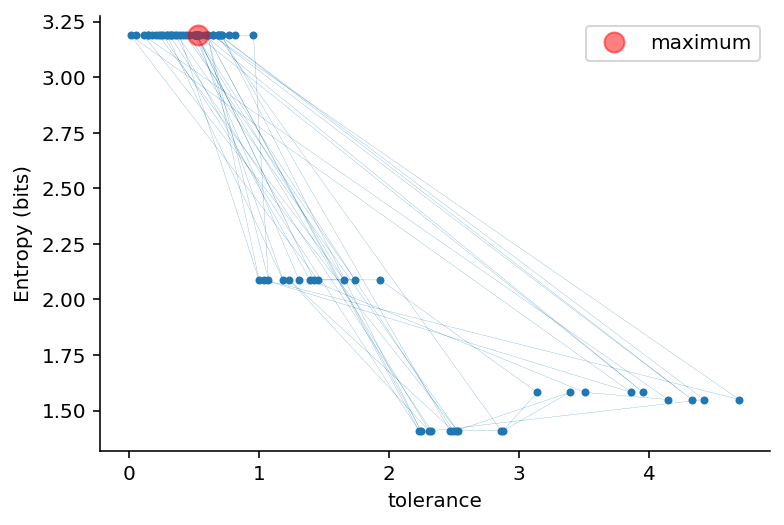

In [42]:
show_optimization(adams_optimizer.trace, adams_res)

### Silhouete

In [44]:
adams_sil_optimizer = TypologyOptimizer(AdamsTypology, scoring_fn=silhouete_score)

In [45]:
adams_sil_best, adams_sil_res = adams_sil_optimizer.optimize(erk_contours[:1000], dict(tolerance=[0, 6]))
adams_sil_best

{'tolerance': 4.7084285840319415}

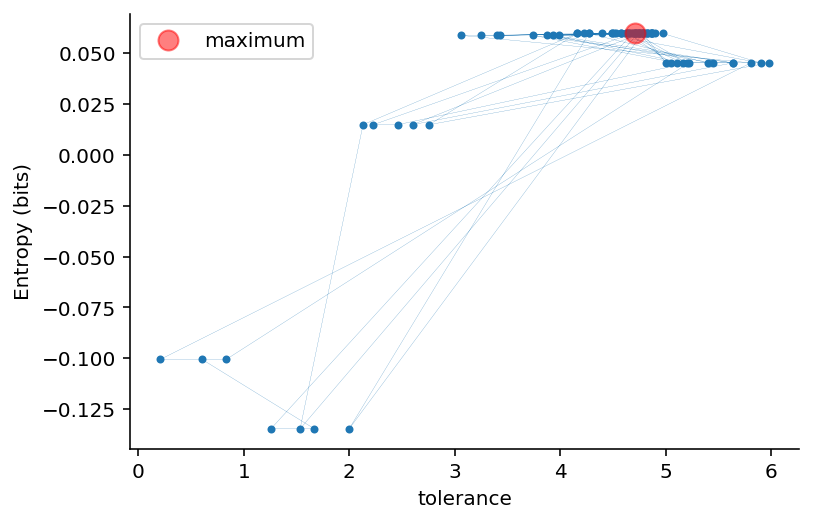

In [46]:
show_optimization(adams_sil_optimizer.trace, adams_sil_res)